In [83]:
import sklearn
import pandas as pd

url="https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Class']

In [84]:
cardata=pd.read_csv(url,names=names)

In [85]:
cardata.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [86]:
x = cardata.iloc[:, 0:6]
y = cardata.iloc[:,6:7]

In [87]:
y.head()

,Class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [88]:
y.Class.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [89]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
x = x.apply(le.fit_transform)
y = y.apply(le.fit_transform)

In [90]:
x.tail()

,buying,maint,doors,persons,lug_boot,safety
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2
1727,1,1,3,2,0,0


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.8)

In [92]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

# 1: With 10 nodes, 2 layers and relu

In [102]:
from sklearn.neural_network import MLPClassifier

n_hidden_nodes = 10
mlp1 = MLPClassifier(activation='relu', hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes])
mlp1.fit(X_train_std, y_train)

print("Activation Func: {}".format(mlp1.activation))
print("Accuracry Score on test set: {}".format(mlp1.score(X_test_std, y_test)))

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation Func: relu
Accuracry Score on test set: 0.9046242774566474


D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [104]:
from sklearn import metrics

y_predicted1 = mlp1.predict(X_test_std)
print(metrics.classification_report(y_test, y_predicted1))

              precision    recall  f1-score   support

           0       0.68      0.90      0.77        59
           1       0.00      0.00      0.00        14
           2       0.98      0.97      0.97       260
           3       0.82      0.69      0.75        13

    accuracy                           0.90       346
   macro avg       0.62      0.64      0.62       346
weighted avg       0.88      0.90      0.89       346



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(91.68, 0.5, 'Predicted Label')

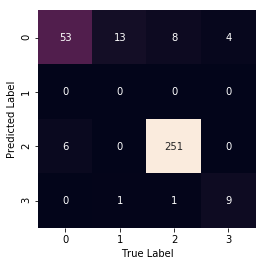

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, y_predicted1)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

# 2: With 10 nodes, 2 layers and tanh

In [113]:
n_hidden_nodes = 10
mlp2 = MLPClassifier(activation='tanh', hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes])
mlp2.fit(X_train_std, y_train)

print("Activation Func: {}".format(mlp2.activation))
print("Accuracry Score on test set: {}".format(mlp2.score(X_test_std, y_test)))

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation Func: tanh
Accuracry Score on test set: 0.8265895953757225


D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [114]:
y_predicted2 = mlp2.predict(X_test_std)
print(metrics.classification_report(y_test, y_predicted2))

              precision    recall  f1-score   support

           0       0.49      0.71      0.58        59
           1       0.00      0.00      0.00        14
           2       0.95      0.93      0.94       260
           3       0.33      0.15      0.21        13

    accuracy                           0.83       346
   macro avg       0.44      0.45      0.43       346
weighted avg       0.81      0.83      0.81       346



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(91.68, 0.5, 'Predicted Label')

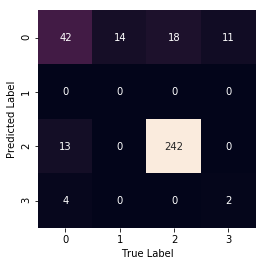

In [115]:
mat = confusion_matrix(y_test, y_predicted2)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

# 3: With 10 nodes, 3 layers and relu

In [116]:
n_hidden_nodes = 10
mlp3 = MLPClassifier(activation='relu', hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes, n_hidden_nodes])
mlp3.fit(X_train_std, y_train)

print("Activation Func: {}".format(mlp3.activation))
print("Accuracry Score on test set: {}".format(mlp3.score(X_test_std, y_test)))

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation Func: relu
Accuracry Score on test set: 0.9393063583815029


D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [117]:
y_predicted3 = mlp3.predict(X_test_std)
print(metrics.classification_report(y_test, y_predicted3))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        59
           1       0.82      0.64      0.72        14
           2       0.98      0.96      0.97       260
           3       1.00      0.92      0.96        13

    accuracy                           0.94       346
   macro avg       0.90      0.86      0.87       346
weighted avg       0.94      0.94      0.94       346



Text(91.68, 0.5, 'Predicted Label')

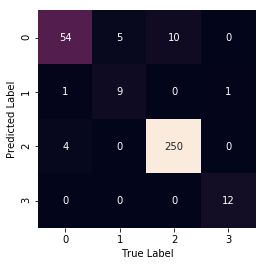

In [118]:
mat = confusion_matrix(y_test, y_predicted3)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

# 4: With 10 nodes, 3 layers and tanh

In [119]:
n_hidden_nodes = 10
mlp4 = MLPClassifier(activation='tanh', hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes, n_hidden_nodes])
mlp4.fit(X_train_std, y_train)

print("Activation Func: {}".format(mlp4.activation))
print("Accuracry Score on test set: {}".format(mlp4.score(X_test_std, y_test)))

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation Func: tanh
Accuracry Score on test set: 0.8815028901734104


D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [120]:
y_predicted4 = mlp4.predict(X_test_std)
print(metrics.classification_report(y_test, y_predicted4))

              precision    recall  f1-score   support

           0       0.61      0.86      0.71        59
           1       0.00      0.00      0.00        14
           2       0.97      0.95      0.96       260
           3       1.00      0.62      0.76        13

    accuracy                           0.88       346
   macro avg       0.64      0.61      0.61       346
weighted avg       0.87      0.88      0.87       346



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(91.68, 0.5, 'Predicted Label')

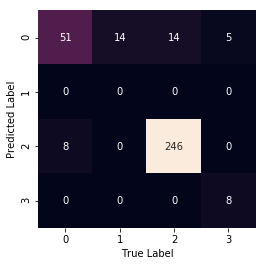

In [121]:
mat = confusion_matrix(y_test, y_predicted4)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

# 5: With 20 nodes, 2 layers and relu

In [123]:
n_hidden_nodes = 20
mlp5 = MLPClassifier(activation='relu', hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes])
mlp5.fit(X_train_std, y_train)

print("Activation Func: {}".format(mlp5.activation))
print("Accuracry Score on test set: {}".format(mlp5.score(X_test_std, y_test)))

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation Func: relu
Accuracry Score on test set: 0.9682080924855492


D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [124]:
y_predicted5 = mlp5.predict(X_test_std)
print(metrics.classification_report(y_test, y_predicted5))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        59
           1       0.88      1.00      0.93        14
           2       0.99      0.98      0.99       260
           3       1.00      0.77      0.87        13

    accuracy                           0.97       346
   macro avg       0.94      0.92      0.93       346
weighted avg       0.97      0.97      0.97       346



Text(91.68, 0.5, 'Predicted Label')

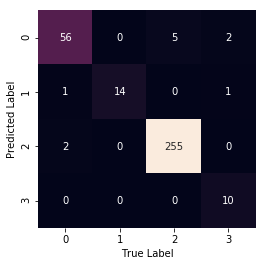

In [125]:
mat = confusion_matrix(y_test, y_predicted5)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

# 6: With 20 nodes, 2 layers and tanh

In [126]:
n_hidden_nodes = 20
mlp6 = MLPClassifier(activation='tanh', hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes])
mlp6.fit(X_train_std, y_train)

print("Activation Func: {}".format(mlp6.activation))
print("Accuracry Score on test set: {}".format(mlp6.score(X_test_std, y_test)))

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation Func: tanh
Accuracry Score on test set: 0.8930635838150289


D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [127]:
y_predicted6 = mlp6.predict(X_test_std)
print(metrics.classification_report(y_test, y_predicted6))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75        59
           1       0.00      0.00      0.00        14
           2       0.99      0.95      0.97       260
           3       1.00      0.54      0.70        13

    accuracy                           0.89       346
   macro avg       0.65      0.61      0.60       346
weighted avg       0.89      0.89      0.88       346



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(91.68, 0.5, 'Predicted Label')

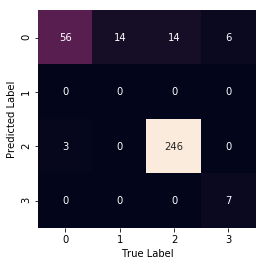

In [128]:
mat = confusion_matrix(y_test, y_predicted6)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

# 7: With 20 nodes, 3 layers and relu

In [129]:
n_hidden_nodes = 20
mlp7 = MLPClassifier(activation='relu', hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes, n_hidden_nodes])
mlp7.fit(X_train_std, y_train)

print("Activation Func: {}".format(mlp7.activation))
print("Accuracry Score on test set: {}".format(mlp7.score(X_test_std, y_test)))

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation Func: relu
Accuracry Score on test set: 0.9884393063583815


D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [130]:
y_predicted7 = mlp7.predict(X_test_std)
print(metrics.classification_report(y_test, y_predicted7))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        59
           1       0.93      1.00      0.97        14
           2       1.00      0.99      0.99       260
           3       1.00      0.92      0.96        13

    accuracy                           0.99       346
   macro avg       0.97      0.97      0.97       346
weighted avg       0.99      0.99      0.99       346



Text(91.68, 0.5, 'Predicted Label')

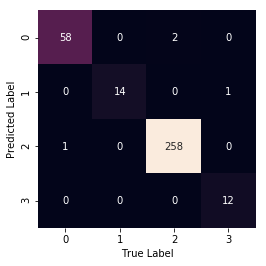

In [131]:
mat = confusion_matrix(y_test, y_predicted7)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

# 8: With 20 nodes, 3 layers and tanh

In [132]:
n_hidden_nodes = 20
mlp8 = MLPClassifier(activation='tanh', hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes, n_hidden_nodes])
mlp8.fit(X_train_std, y_train)

print("Activation Func: {}".format(mlp8.activation))
print("Accuracry Score on test set: {}".format(mlp8.score(X_test_std, y_test)))

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation Func: tanh
Accuracry Score on test set: 0.9508670520231214


D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [136]:
y_predicted8 = mlp8.predict(X_test_std)
print(metrics.classification_report(y_test, y_predicted8))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        59
           1       0.80      0.57      0.67        14
           2       0.99      0.97      0.98       260
           3       0.92      0.92      0.92        13

    accuracy                           0.95       346
   macro avg       0.88      0.85      0.86       346
weighted avg       0.95      0.95      0.95       346



Text(91.68, 0.5, 'Predicted Label')

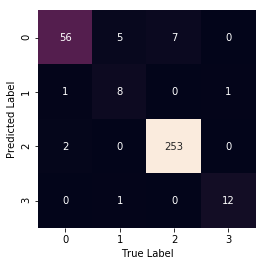

In [137]:
mat = confusion_matrix(y_test, y_predicted8)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")